# Standard Problem 1

## Specifications
Lets try to solve the first standard problem which is about ploting the hysteresis curve for a material with the following parameters:

- **Exchange Coefficient**: $A=1.3 \times 10^{-11} \;[\text{J/m}]$
- **Anisotropic Energy**: $K=5\times 10^2 \;[\text{J/m}^3]$
- **Saturation Magnetisation**: $M_s=8\times 10^5 \;[\text{A/m}]$

:::{figure} ../images/std_p1.png
:name: std-problem1
:::

To simulate this we will use [UberMag](https://ubermag.github.io/index.html) package which collects many micromagnetic packages for python.
First we import the libraries to define the system and initialize the field, we also import the backend used to solve the equations; in this case, [OOMMF](https://math.nist.gov/oommf/%).

In [1]:
import micromagneticmodel as mm
import discretisedfield as df
import oommfc as mc

Next we define the object in the `system`

In [2]:
system = mm.System(name="standard_problem1")

Here we define the material parameters and the energies we will take into account.

In [3]:
A = 1.3e-11  #exchange energy (J/m)
K = 5e2 # Anistropic energy (J/m3)
Ms = 8e5 # Saturation magnetisation (A/m)
system.energy = mm.Exchange(A=A) + mm.Demag() + mm.UniaxialAnisotropy(K=K, u=(1,0,0))

In [5]:
system.energy

Exchange(A=1.3e-11) + Demag() + UniaxialAnisotropy(K=500.0, u=(1, 0, 0))

we continue defining the region specified by the standard problem. Here we first simulate by using 100 cells in the directions X and Y; and 10 cells in the direction Z.

In [4]:
L_x = 2e-6 # x-length edge (m)
L_y = 1e-6 # y-length edge (m)
L_z = 20e-9 # z-length edge (m)
region = df.Region(
    p1=(0,0,0),
    p2=(L_x,L_y,L_z)
)
mesh = df.Mesh(
    region=region,
    n=(100,100,10)
)

system.m = df.Field(
    mesh,
    nvdim=3,
    value=(1,0,0),
    norm=Ms
)

Finally, the values for the magnetic field and the number of steps used are defined.

In [6]:
Hmin =  (-50e-3 / mm.consts.mu0, 0, 0)
Hmax = (50e-3 / mm.consts.mu0, 0, 0)
n = 21

In [7]:
hd = mc.HysteresisDriver()
hd.drive(system, Hmin=Hmin, Hmax=Hmax, n=n)

Running OOMMF (TclOOMMFRunner)[2025/05/20 19:17]... (474.7 s)


In [8]:
system.table.units["B_hysteresis"]

'mT'

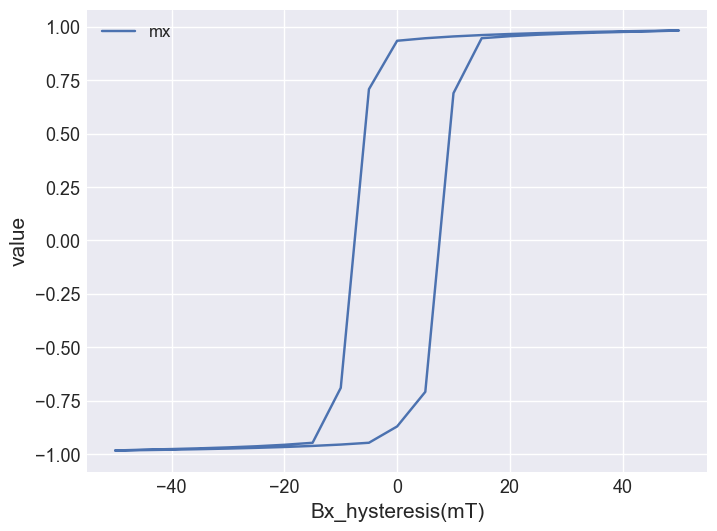

In [9]:
system.table.mpl(x="Bx_hysteresis", y=["mx"])